In [104]:
#WEEK 1 START
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
#create pandas DataFrame for financial anomaly data
financial_df = pd.read_csv("financial_anomaly_data.csv")

In [38]:
#print first 5 columns of DataFrame
financial_df.head(5)

,Timestamp,TransactionID,AccountID,Amount,Merchant,TransactionType,Location
0,01-01-2023 08:00,TXN1127,ACC4,95071.92,MerchantH,Purchase,Tokyo
1,01-01-2023 08:01,TXN1639,ACC10,15607.89,MerchantH,Purchase,London
2,01-01-2023 08:02,TXN872,ACC8,65092.34,MerchantE,Withdrawal,London
3,01-01-2023 08:03,TXN1438,ACC6,87.87,MerchantE,Purchase,London
4,01-01-2023 08:04,TXN1338,ACC6,716.56,MerchantI,Purchase,Los Angeles


In [36]:
#print class, RangeIndex, columns, non-null count, data type, and memory usage information
financial_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217441 entries, 0 to 217440
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Timestamp        216960 non-null  object 
 1   TransactionID    216960 non-null  object 
 2   AccountID        216960 non-null  object 
 3   Amount           216960 non-null  float64
 4   Merchant         216960 non-null  object 
 5   TransactionType  216960 non-null  object 
 6   Location         216960 non-null  object 
dtypes: float64(1), object(6)
memory usage: 11.6+ MB


In [39]:
#print shape of DataFrame
financial_df.shape

(217441, 7)

In [40]:
#print sum of null occurrences of each variable in DataFrame
print(financial_df.isnull().sum())

Timestamp          481
TransactionID      481
AccountID          481
Amount             481
Merchant           481
TransactionType    481
Location           481
dtype: int64


In [41]:
#create a new DataFrame excluding null occurrences
new_financial_df = financial_df.dropna()

In [42]:
#print shape of new DataFrame
new_financial_df.shape

(216960, 7)

In [43]:
#verify that null occurrences were handled properly
print(new_financial_df.isnull().sum())

Timestamp          0
TransactionID      0
AccountID          0
Amount             0
Merchant           0
TransactionType    0
Location           0
dtype: int64


In [44]:
#print number of unique occurrences of each variable in DataFrame
print(f"Number of unique Timestamp: {new_financial_df['Timestamp'].nunique()}")
print(f"Number of unique TransactionID: {new_financial_df['TransactionID'].nunique()}")
print(f"Number of unique AccountID: {new_financial_df['AccountID'].nunique()}")
print(f"Number of unique Amount: {new_financial_df['Amount'].nunique()}")
print(f"Number of unique Merchant: {new_financial_df['Merchant'].nunique()}")
print(f"Number of unique TransactionType: {new_financial_df['TransactionType'].nunique()}")
print(f"Number of unique Location: {new_financial_df['Location'].nunique()}")

Number of unique Timestamp: 216960
Number of unique TransactionID: 1999
Number of unique AccountID: 15
Number of unique Amount: 214687
Number of unique Merchant: 10
Number of unique TransactionType: 3
Number of unique Location: 5


In [66]:
#introduce new variables to DataFrame for analysis of certain variables' interactions
new_financial_df['AccountID/Merchant'] = new_financial_df['AccountID'].astype(str) + '_' + new_financial_df['Merchant']
new_financial_df['AccountID/TransactionID'] = new_financial_df['AccountID'].astype(str) + '_' + new_financial_df['TransactionID']
new_financial_df['AccountID/Merchant/TransactionID'] = new_financial_df['AccountID'].astype(str) + '_' + new_financial_df['Merchant'] + '_' + new_financial_df['TransactionID']
new_financial_df['TransactionType/Merchant'] = new_financial_df['TransactionType'].astype(str) + '_' + new_financial_df['Merchant']
new_financial_df['Location/TransactionType'] = new_financial_df['Location'].astype(str) + '_' + new_financial_df['TransactionType']
new_financial_df['Merchant/Location'] = new_financial_df['Merchant'].astype(str) + '_' + new_financial_df['Location']

C:\Users\brady\AppData\Local\Temp\ipykernel_5676\3560603646.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_financial_df['AccountID/Merchant'] = new_financial_df['AccountID'].astype(str) + '_' + new_financial_df['Merchant']
C:\Users\brady\AppData\Local\Temp\ipykernel_5676\3560603646.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_financial_df['AccountID/TransactionID'] = new_financial_df['AccountID'].astype(str) + '_' + new_financial_df['TransactionID']
C:\Users\brady\AppData\Local\Temp\ipyk

In [68]:
#verify that new variables have been created successfully
new_financial_df.head(5)

,Timestamp,TransactionID,AccountID,Amount,Merchant,TransactionType,Location,AccountID/Merchant,AccountID/TransactionID,AccountID/Merchant/TransactionID,TransactionType/Merchant,Location/TransactionType,Merchant/Location
0,01-01-2023 08:00,TXN1127,ACC4,95071.92,MerchantH,Purchase,Tokyo,ACC4_MerchantH,ACC4_TXN1127,ACC4_MerchantH_TXN1127,Purchase_MerchantH,Tokyo_Purchase,MerchantH_Tokyo
1,01-01-2023 08:01,TXN1639,ACC10,15607.89,MerchantH,Purchase,London,ACC10_MerchantH,ACC10_TXN1639,ACC10_MerchantH_TXN1639,Purchase_MerchantH,London_Purchase,MerchantH_London
2,01-01-2023 08:02,TXN872,ACC8,65092.34,MerchantE,Withdrawal,London,ACC8_MerchantE,ACC8_TXN872,ACC8_MerchantE_TXN872,Withdrawal_MerchantE,London_Withdrawal,MerchantE_London
3,01-01-2023 08:03,TXN1438,ACC6,87.87,MerchantE,Purchase,London,ACC6_MerchantE,ACC6_TXN1438,ACC6_MerchantE_TXN1438,Purchase_MerchantE,London_Purchase,MerchantE_London
4,01-01-2023 08:04,TXN1338,ACC6,716.56,MerchantI,Purchase,Los Angeles,ACC6_MerchantI,ACC6_TXN1338,ACC6_MerchantI_TXN1338,Purchase_MerchantI,Los Angeles_Purchase,MerchantI_Los Angeles


In [74]:
#convert Timestamp variable to a DateTime object
new_financial_df['Timestamp'] = pd.to_datetime(new_financial_df['Timestamp'], format='%d-%m-%Y %H:%M')

C:\Users\brady\AppData\Local\Temp\ipykernel_5676\585645809.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_financial_df['Timestamp'] = pd.to_datetime(new_financial_df['Timestamp'], format='%d-%m-%Y %H:%M')


In [114]:
#create distinct features for minute/hour of the day, day of the week, and month
new_financial_df['Minute'] = new_financial_df['Timestamp'].dt.minute
new_financial_df['Hour'] = new_financial_df['Timestamp'].dt.hour
new_financial_df['Day'] = new_financial_df['Timestamp'].dt.dayofweek
new_financial_df['Month'] = new_financial_df['Timestamp'].dt.month

C:\Users\brady\AppData\Local\Temp\ipykernel_5676\2535565269.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_financial_df['Minute'] = new_financial_df['Timestamp'].dt.minute
C:\Users\brady\AppData\Local\Temp\ipykernel_5676\2535565269.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_financial_df['Hour'] = new_financial_df['Timestamp'].dt.hour
C:\Users\brady\AppData\Local\Temp\ipykernel_5676\2535565269.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

In [120]:
#verify again that new variables have been created successfully
new_financial_df.head(5)

,Timestamp,TransactionID,AccountID,Amount,Merchant,TransactionType,Location,AccountID/Merchant,AccountID/TransactionID,AccountID/Merchant/TransactionID,TransactionType/Merchant,Location/TransactionType,Merchant/Location,Minute,Hour,Month,Amount_Partitions,Day
0,2023-01-01 08:00:00,TXN1127,ACC4,95071.92,MerchantH,Purchase,Tokyo,ACC4_MerchantH,ACC4_TXN1127,ACC4_MerchantH_TXN1127,Purchase_MerchantH,Tokyo_Purchase,MerchantH_Tokyo,0,8,1,"90,001-100,000",6
1,2023-01-01 08:01:00,TXN1639,ACC10,15607.89,MerchantH,Purchase,London,ACC10_MerchantH,ACC10_TXN1639,ACC10_MerchantH_TXN1639,Purchase_MerchantH,London_Purchase,MerchantH_London,1,8,1,"10,001-20,000",6
2,2023-01-01 08:02:00,TXN872,ACC8,65092.34,MerchantE,Withdrawal,London,ACC8_MerchantE,ACC8_TXN872,ACC8_MerchantE_TXN872,Withdrawal_MerchantE,London_Withdrawal,MerchantE_London,2,8,1,"60,001-70,000",6
3,2023-01-01 08:03:00,TXN1438,ACC6,87.87,MerchantE,Purchase,London,ACC6_MerchantE,ACC6_TXN1438,ACC6_MerchantE_TXN1438,Purchase_MerchantE,London_Purchase,MerchantE_London,3,8,1,"0-10,000",6
4,2023-01-01 08:04:00,TXN1338,ACC6,716.56,MerchantI,Purchase,Los Angeles,ACC6_MerchantI,ACC6_TXN1338,ACC6_MerchantI_TXN1338,Purchase_MerchantI,Los Angeles_Purchase,MerchantI_Los Angeles,4,8,1,"0-10,000",6


In [87]:
#Divide amount variable into appropriately-sized partitions
bins = [0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, float('inf')]
labels = ['0-10,000', '10,001-20,000', '20,001-30,000', '30,001-40,000', '40,001-50,000', '50,001-60,000', '60,001-70,000', '70,001-80,000', '80,001-90,000', '90,001-100,000', '100,001+']
new_financial_df['Amount_Partitions'] = pd.cut(new_financial_df['Amount'], bins=bins, labels=labels)

C:\Users\brady\AppData\Local\Temp\ipykernel_5676\3509991203.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_financial_df['Amount_Partitions'] = pd.cut(new_financial_df['Amount'], bins=bins, labels=labels)


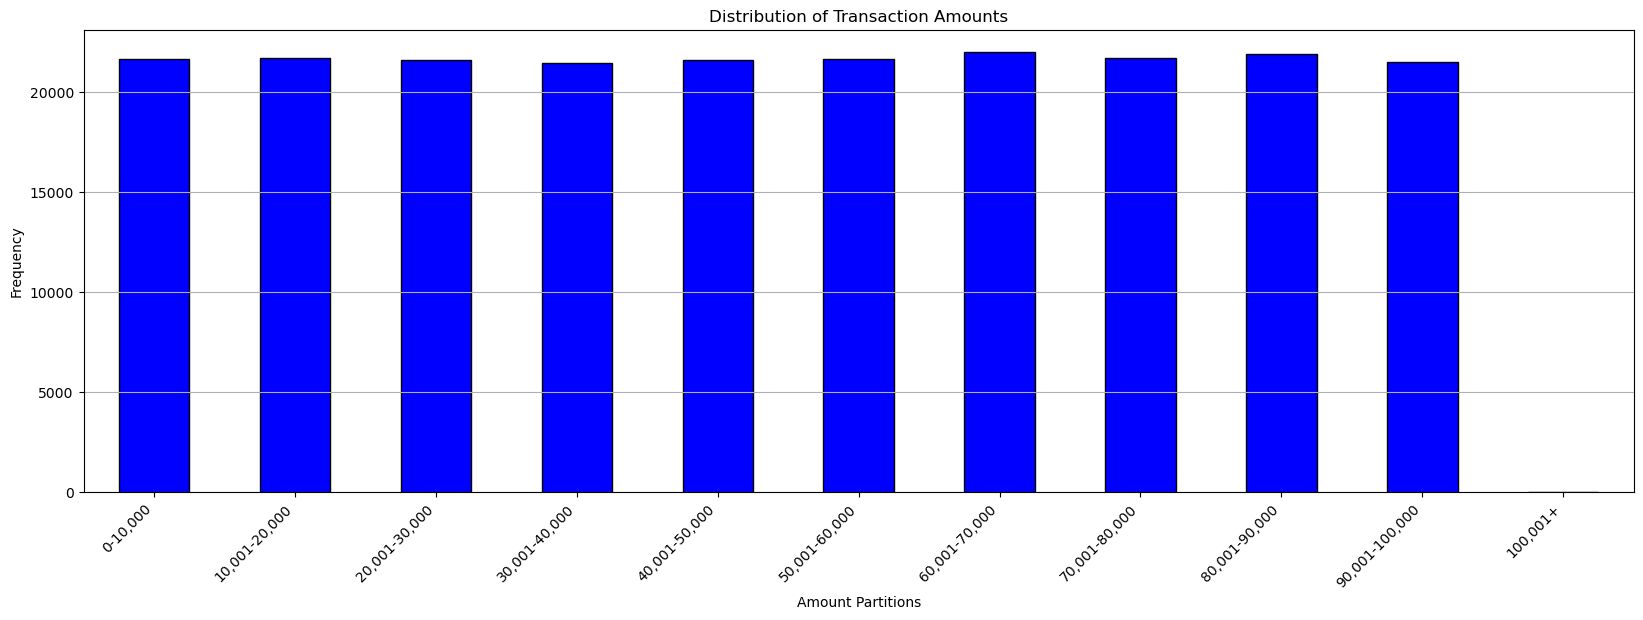

In [109]:
#Construct Bar Graph for distribution of transaction in each amount partition
partition_counts = new_financial_df['Amount_Partitions'].value_counts().reindex(labels)

plt.figure(figsize=(20, 6))
partition_counts.plot(kind='bar', color='blue', edgecolor='black')
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount Partitions')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

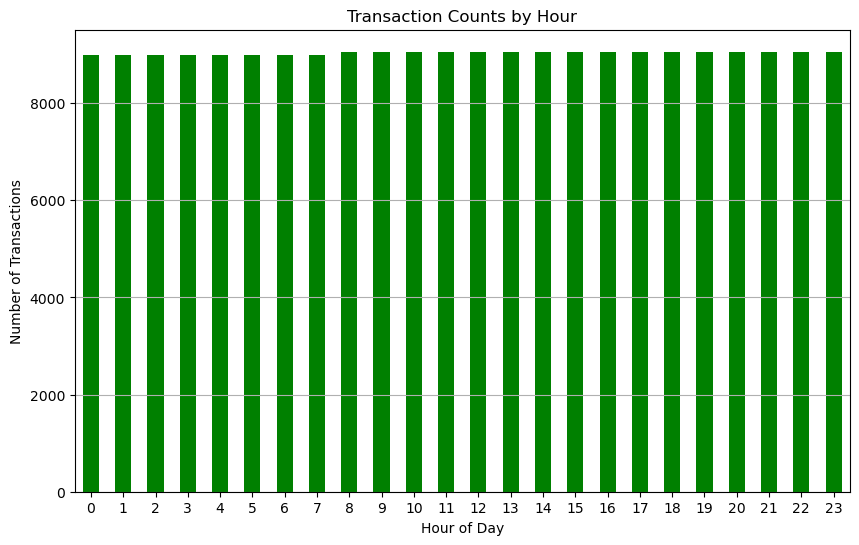

In [110]:
#Construct bar graph for total number of transactions per hour
hour_counts = new_financial_df['Hour'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
hour_counts.plot(kind='bar', color='green')
plt.title('Transaction Counts by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

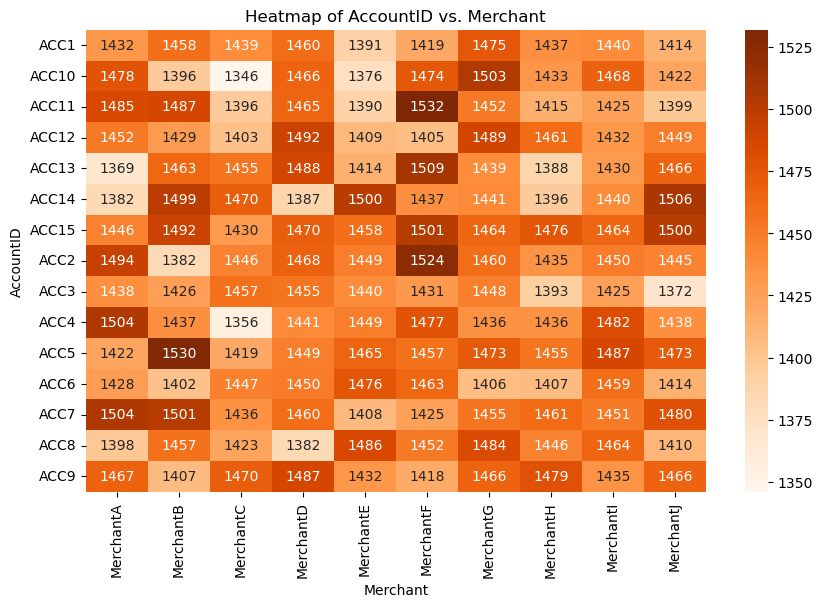

In [111]:
#Construct heat map to visualize total amounts of each combination of AccountID and Merchant (150 combinations)
pivot_table = pd.crosstab(new_financial_df['AccountID'], new_financial_df['Merchant'])

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='Oranges', fmt='d')
plt.title('Heatmap of AccountID vs. Merchant')
plt.xlabel('Merchant')
plt.ylabel('AccountID')
plt.show()

In [119]:
#print a sample of the first 10 values of the cleaned dataset with new variab
new_financial_df.head(10)

,Timestamp,TransactionID,AccountID,Amount,Merchant,TransactionType,Location,AccountID/Merchant,AccountID/TransactionID,AccountID/Merchant/TransactionID,TransactionType/Merchant,Location/TransactionType,Merchant/Location,Minute,Hour,Month,Amount_Partitions,Day
0,2023-01-01 08:00:00,TXN1127,ACC4,95071.92,MerchantH,Purchase,Tokyo,ACC4_MerchantH,ACC4_TXN1127,ACC4_MerchantH_TXN1127,Purchase_MerchantH,Tokyo_Purchase,MerchantH_Tokyo,0,8,1,"90,001-100,000",6
1,2023-01-01 08:01:00,TXN1639,ACC10,15607.89,MerchantH,Purchase,London,ACC10_MerchantH,ACC10_TXN1639,ACC10_MerchantH_TXN1639,Purchase_MerchantH,London_Purchase,MerchantH_London,1,8,1,"10,001-20,000",6
2,2023-01-01 08:02:00,TXN872,ACC8,65092.34,MerchantE,Withdrawal,London,ACC8_MerchantE,ACC8_TXN872,ACC8_MerchantE_TXN872,Withdrawal_MerchantE,London_Withdrawal,MerchantE_London,2,8,1,"60,001-70,000",6
3,2023-01-01 08:03:00,TXN1438,ACC6,87.87,MerchantE,Purchase,London,ACC6_MerchantE,ACC6_TXN1438,ACC6_MerchantE_TXN1438,Purchase_MerchantE,London_Purchase,MerchantE_London,3,8,1,"0-10,000",6
4,2023-01-01 08:04:00,TXN1338,ACC6,716.56,MerchantI,Purchase,Los Angeles,ACC6_MerchantI,ACC6_TXN1338,ACC6_MerchantI_TXN1338,Purchase_MerchantI,Los Angeles_Purchase,MerchantI_Los Angeles,4,8,1,"0-10,000",6
5,2023-01-01 08:05:00,TXN1083,ACC15,13957.99,MerchantC,Transfer,London,ACC15_MerchantC,ACC15_TXN1083,ACC15_MerchantC_TXN1083,Transfer_MerchantC,London_Transfer,MerchantC_London,5,8,1,"10,001-20,000",6
6,2023-01-01 08:06:00,TXN832,ACC9,4654.58,MerchantC,Transfer,Tokyo,ACC9_MerchantC,ACC9_TXN832,ACC9_MerchantC_TXN832,Transfer_MerchantC,Tokyo_Transfer,MerchantC_Tokyo,6,8,1,"0-10,000",6
7,2023-01-01 08:07:00,TXN841,ACC7,1336.36,MerchantI,Withdrawal,San Francisco,ACC7_MerchantI,ACC7_TXN841,ACC7_MerchantI_TXN841,Withdrawal_MerchantI,San Francisco_Withdrawal,MerchantI_San Francisco,7,8,1,"0-10,000",6
8,2023-01-01 08:08:00,TXN777,ACC10,9776.23,MerchantD,Transfer,London,ACC10_MerchantD,ACC10_TXN777,ACC10_MerchantD_TXN777,Transfer_MerchantD,London_Transfer,MerchantD_London,8,8,1,"0-10,000",6
9,2023-01-01 08:09:00,TXN1479,ACC12,49522.74,MerchantC,Withdrawal,New York,ACC12_MerchantC,ACC12_TXN1479,ACC12_MerchantC_TXN1479,Withdrawal_MerchantC,New York_Withdrawal,MerchantC_New York,9,8,1,"40,001-50,000",6


In [118]:
new_financial_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 216960 entries, 0 to 216959
Data columns (total 18 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   Timestamp                         216960 non-null  datetime64[ns]
 1   TransactionID                     216960 non-null  object        
 2   AccountID                         216960 non-null  object        
 3   Amount                            216960 non-null  float64       
 4   Merchant                          216960 non-null  object        
 5   TransactionType                   216960 non-null  object        
 6   Location                          216960 non-null  object        
 7   AccountID/Merchant                216960 non-null  object        
 8   AccountID/TransactionID           216960 non-null  object        
 9   AccountID/Merchant/TransactionID  216960 non-null  object        
 10  TransactionType/Merchant          216

In [117]:
#print number of unique occurrences of newly created variables
print(f"Number of unique AccountID/Merchant: {new_financial_df['AccountID/Merchant'].nunique()}")
print(f"Number of unique AccountID/TransactionID: {new_financial_df['AccountID/TransactionID'].nunique()}")
print(f"Number of unique AccountID/Merchant/TransactionID: {new_financial_df['AccountID/Merchant/TransactionID'].nunique()}")
print(f"Number of unique TransactionType/Merchant: {new_financial_df['TransactionType/Merchant'].nunique()}")
print(f"Number of unique Location/TransactionType: {new_financial_df['Location/TransactionType'].nunique()}")
print(f"Number of unique Merchant/Location: {new_financial_df['Merchant/Location'].nunique()}")
print(f"Number of unique Minute: {new_financial_df['Minute'].nunique()}")
print(f"Number of unique Hour: {new_financial_df['Hour'].nunique()}")
print(f"Number of unique Day: {new_financial_df['Day'].nunique()}")
print(f"Number of unique Month: {new_financial_df['Month'].nunique()}")
print(f"Number of unique Amount_Partitions: {new_financial_df['Amount_Partitions'].nunique()}")

Number of unique AccountID/Merchant: 150
Number of unique AccountID/TransactionID: 29967
Number of unique AccountID/Merchant/TransactionID: 154226
Number of unique TransactionType/Merchant: 30
Number of unique Location/TransactionType: 15
Number of unique Merchant/Location: 50
Number of unique Minute: 60
Number of unique Hour: 24
Number of unique Day: 7
Number of unique Month: 5
Number of unique Amount_Partitions: 11
